<a href="https://colab.research.google.com/github/kurikinton105/GDL_code_colab/blob/main/05_01_cyclegan_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First install keras_contrib. Enter the following into your terminal...

git clone https://www.github.com/keras-team/keras-contrib.git
python keras-contrib/convert_to_tf_keras.py
USE_TF_KERAS=1 python keras-contrib/setup.py install
rm -rf keras-contrib

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-n466po71
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-n466po71
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=2e59bb559b2c6b00d5743c0f1a82608a70eda0942c2bc8484e1e928b7ae15902
  Stored in directory: /tmp/pip-ephem-wheel-cache-1c70e3rx/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [ ]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 3.9MB 42.2MB/s 
     |████████████████████████████████| 450kB 44.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=f5de13b04b58dcf1fce024e76880dff32a7d886c9ec0d54b17916d1644ef8b1b
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/GDL/

/content/drive/My Drive/Colab Notebooks/GDL


# CycleGAN train

In [ ]:
import os
import matplotlib.pyplot as plt

from models.cycleGAN import CycleGAN
from utils.loaders import DataLoader

Using TensorFlow backend.


In [ ]:

# run params
SECTION = 'paint'
RUN_ID = '0001'
DATA_NAME = 'apple2orange'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' # 'build' # 

# data

In [ ]:
IMAGE_SIZE = 128

In [ ]:

data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))


# architecture

In [ ]:
gan = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0002
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 2
    , generator_type = 'unet'
    , gen_n_filters = 32
    , disc_n_filters = 32
    )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))
    


In [ ]:
gan.g_BA.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 64, 64, 32)   1568        input_4[0][0]                    
__________________________________________________________________________________________________
instance_normalization_13 (Inst (None, 64, 64, 32)   0           conv2d_18[0][0]                  
__________________________________________________________________________________________________
activation_7 (Activation)       (None, 64, 64, 32)   0           instance_normalization_13[0][0]  
____________________________________________________________________________________________

In [ ]:
gan.g_AB.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 64, 64, 32)   1568        input_3[0][0]                    
__________________________________________________________________________________________________
instance_normalization_6 (Insta (None, 64, 64, 32)   0           conv2d_10[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 64, 64, 32)   0           instance_normalization_6[0][0]   
____________________________________________________________________________________________

In [ ]:
gan.d_A.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        1568      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        32832     
_________________________________________________________________
instance_normalization (Inst (None, 32, 32, 64)        0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       131200

In [ ]:
gan.d_B.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        1568      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        32832     
_________________________________________________________________
instance_normalization_3 (In (None, 32, 32, 64)        0         
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       1312

# train

In [ ]:
BATCH_SIZE = 1
EPOCHS = 1
PRINT_EVERY_N_BATCHES = 10

TEST_A_FILE = 'n07740461_14740.jpg'
TEST_B_FILE = 'n07749192_4241.jpg'

In [ ]:
gan.train(data_loader
        , run_folder = RUN_FOLDER
        , epochs=EPOCHS
        , test_A_file = TEST_A_FILE
        , test_B_file = TEST_B_FILE
        , batch_size=BATCH_SIZE
        , sample_interval=PRINT_EVERY_N_BATCHES)
        

[Epoch 0/1] [Batch 0/995] [D loss: 0.561027, acc:  52%] [G loss: 14.075829, adv: 1.406284, recon: 1.016322, id: 1.204912] time: 0:00:03.625419 
[Epoch 0/1] [Batch 1/995] [D loss: 0.808636, acc:  56%] [G loss: 18.814972, adv: 1.535658, recon: 1.392443, id: 1.677441] time: 0:00:17.497852 
[Epoch 0/1] [Batch 2/995] [D loss: 0.670080, acc:  51%] [G loss: 16.367428, adv: 1.306670, recon: 1.225032, id: 1.405218] time: 0:00:20.605819 
[Epoch 0/1] [Batch 3/995] [D loss: 1.018217, acc:  48%] [G loss: 14.456411, adv: 1.626270, recon: 1.019103, id: 1.319556] time: 0:00:23.670944 
[Epoch 0/1] [Batch 4/995] [D loss: 0.762684, acc:  57%] [G loss: 17.799194, adv: 1.383169, recon: 1.284588, id: 1.785074] time: 0:00:26.798536 
[Epoch 0/1] [Batch 5/995] [D loss: 0.597838, acc:  51%] [G loss: 21.445833, adv: 1.494411, recon: 1.575987, id: 2.095777] time: 0:00:29.919124 
[Epoch 0/1] [Batch 6/995] [D loss: 0.629590, acc:  50%] [G loss: 13.220776, adv: 1.309687, recon: 0.956513, id: 1.172980] time: 0:00:33.

# loss

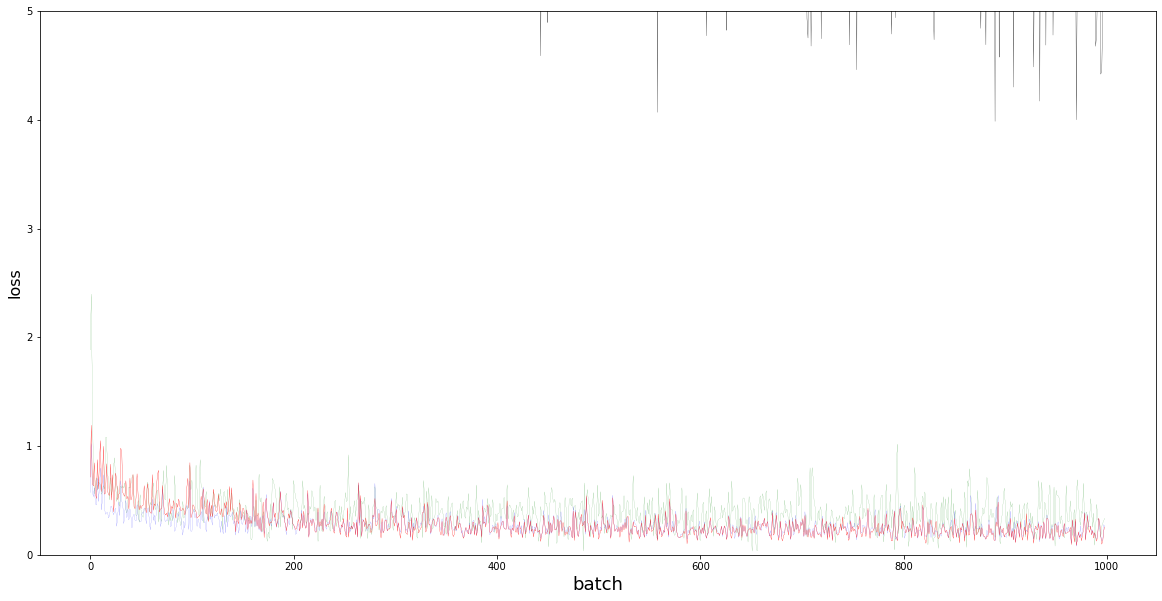

In [ ]:
fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.g_losses], color='green', linewidth=0.1) #DISCRIM LOSS
# plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.1)
plt.plot([x[3] for x in gan.g_losses], color='blue', linewidth=0.1) #CYCLE LOSS
# plt.plot([x[4] for x in gan.g_losses], color='orange', linewidth=0.25)
plt.plot([x[5] for x in gan.g_losses], color='red', linewidth=0.25) #ID LOSS
# plt.plot([x[6] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25)

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()